In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from scipy.stats import skew

In [20]:
train = pd.read_csv('loan_prediction_train.csv')
test = pd.read_csv('loan_prediction_train.csv')

# Modélisation rapide

In [33]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

In [22]:
train.drop(['Loan_ID'], axis=1, inplace=True)
test_id = test.Loan_ID
test.drop(['Loan_ID'], axis=1, inplace=True)

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
train.dropna(axis = 0,inplace=True )

In [51]:
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(train[['Self_Employed']])

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 1)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (529, 0)	1.0
  (530, 0)	1.0
  (531, 0)	1.0
  (532, 0)	1.0
  (533, 1)	1.0
  (534, 0)	1.0
  (535, 1)	1.0
  (536, 0)	1.0
  (537, 1)	1.0
  (538, 0)	1.0
  (539, 1)	1.0
  (540, 1)	1.0
  (541, 0)	1.0
  (542, 0)	1.0
  (543, 0)	1.0
  (544, 0)	1.0
  (545, 0)	1.0
  (546, 0)	1.0
  (547, 0)	1.0
  (548, 0)	1.0
  (549, 0)	1.0
  (550, 0)	1.0
  (551, 0)	1.0
  (552, 0)	1.0
  (553, 1)	1.0


In [19]:
for col in train.columns.drop('Loan_Status'):
    if train[col].dtype != 'object':
        if skew(train[col]) > 0.75:
            train[col] = np.log1p(train[col])
        pass
    else:
        dummies = pd.get_dummies(train[col], drop_first=False)
        dummies = dummies.add_prefix("{}_".format(col))
        train.drop(col, axis=1, inplace=True)
        train = train.join(dummies)
        
for col in test.columns:
    if test[col].dtype != 'object':
        if skew(test[col]) > 0.75:
            test[col] = np.log1p(test[col])
        pass
    else:
        dummies = pd.get_dummies(test[col], drop_first=False)
        dummies = dummies.add_prefix("{}_".format(col))
        test.drop(col, axis=1, inplace=True)
        test = test.join(dummies)

     Female  Male
0         0     1
1         0     1
2         0     1
3         0     1
4         0     1
..      ...   ...
609       1     0
610       0     1
611       0     1
612       0     1
613       1     0

[614 rows x 2 columns]
     Gender_Female  Gender_Male
0                0            1
1                0            1
2                0            1
3                0            1
4                0            1
..             ...          ...
609              1            0
610              0            1
611              0            1
612              0            1
613              1            0

[614 rows x 2 columns]
     No  Yes
0     1    0
1     0    1
2     0    1
3     0    1
4     1    0
..   ..  ...
609   1    0
610   0    1
611   0    1
612   0    1
613   1    0

[614 rows x 2 columns]
     Married_No  Married_Yes
0             1            0
1             0            1
2             0            1
3             0            1
4             1            

In [7]:
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,4.993232,360.0,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,8.430327,7.319202,4.859812,360.0,1.0,N,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,8.006701,0.000000,4.204693,360.0,1.0,Y,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,7.857094,7.765993,4.795791,360.0,1.0,Y,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,8.699681,0.000000,4.955827,360.0,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,7.972811,0.000000,4.276666,360.0,1.0,Y,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
610,8.320448,0.000000,3.713572,180.0,1.0,Y,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0
611,8.996280,5.484797,5.537334,360.0,1.0,Y,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
612,8.933796,0.000000,5.236442,360.0,1.0,Y,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


In [6]:
from sklearn.preprocessing import LabelEncoder
X_train = train.drop('Loan_Status', axis=1)
le = LabelEncoder()
Y_train = le.fit_transform(train.Loan_Status.values)
X_test = test

In [7]:
#Estimation de l'importance des variables.
clf = RandomForestClassifier(n_estimators=200)
clf = clf.fit(X_train, Y_train)
indices = np.argsort(clf.feature_importances_)[::-1]

print('Feature ranking:')
for f in range(X_train.shape[1]):
    print('%d. feature %d %s (%f)' % (f + 1, indices[f], X_train.columns[indices[f]],
                                      clf.feature_importances_[indices[f]]))

Feature ranking:
1. feature 4 Credit_History (0.254112)
2. feature 0 ApplicantIncome (0.186519)
3. feature 2 LoanAmount (0.168088)
4. feature 1 CoapplicantIncome (0.107469)
5. feature 3 Loan_Amount_Term (0.047251)
6. feature 18 Property_Area_Semiurban (0.021870)
7. feature 9 Dependents_0 (0.018846)
8. feature 17 Property_Area_Rural (0.018124)
9. feature 10 Dependents_1 (0.017905)
10. feature 6 Gender_Male (0.017065)
11. feature 15 Self_Employed_No (0.016844)
12. feature 7 Married_No (0.015414)
13. feature 19 Property_Area_Urban (0.014994)
14. feature 14 Education_Not Graduate (0.014929)
15. feature 8 Married_Yes (0.014741)
16. feature 13 Education_Graduate (0.014272)
17. feature 16 Self_Employed_Yes (0.013405)
18. feature 11 Dependents_2 (0.013223)
19. feature 5 Gender_Female (0.012865)
20. feature 12 Dependents_3+ (0.012066)


In [8]:
#je vais ici utiliser les 5 variables les plus important.
best_features=X_train.columns[indices[0:5]]
X = X_train[best_features]
Xt = X_test[best_features]

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y_train, test_size=0.20, random_state=36)

In [10]:
clf = RandomForestClassifier(n_estimators=300, n_jobs=-1, criterion = 'gini')
#CalibratedClassifierCV - étalonnage des probabilités avec validation croisée.
calibrated_clf = CalibratedClassifierCV(clf, method='isotonic', cv=5)
calibrated_clf.fit(Xtrain, ytrain)
y_val = calibrated_clf.predict_proba(Xtest)
y_f = [1 if y_val[i][0] < 0.5 else 0 for i in range(len(ytest))]
print("Validation accuracy: ", sum(y_f == ytest) / len(ytest))

Validation accuracy:  0.7642276422764228


In [11]:
clf = RandomForestClassifier(n_estimators=300, n_jobs=-1, criterion = 'gini')
calibrated_clf = CalibratedClassifierCV(clf, method='isotonic', cv=5)
calibrated_clf.fit(X, Y_train)
y_submit = calibrated_clf.predict_proba(Xt)
submission = pd.DataFrame({'Loan_ID':test_id,
                           'Loan_Status':le.inverse_transform([1 if y_submit[i][0] < 0.5 else 0 for i in range(len(Xt))])})
submission.to_csv('Loan.csv', index=False)

In [12]:
train = pd.read_csv('loan_prediction_train.csv')
test = pd.read_csv('loan_prediction_train.csv')

# Data exploration

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001518,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [16]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Loan_ID

In [17]:
train.drop(['Loan_ID'], axis=1, inplace=True)
test_id = test.Loan_ID
test.drop(['Loan_ID'], axis=1, inplace=True)

# Gender

In [18]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

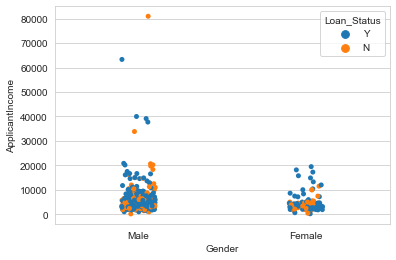

In [19]:
sns.stripplot(x="Gender", y="ApplicantIncome", data=train, hue='Loan_Status', jitter=True)

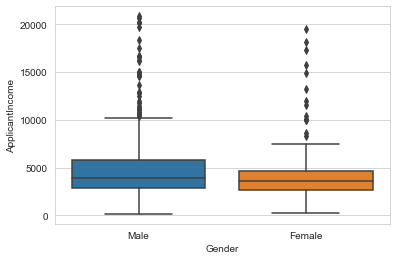

In [20]:
sns.boxplot(x='Gender', y='ApplicantIncome',  data=train.loc[train.ApplicantIncome < 25000])

In [21]:
train.groupby(['Gender'])['Loan_Status'].value_counts(normalize=True)

Gender  Loan_Status
Female  Y              0.669643
        N              0.330357
Male    Y              0.693252
        N              0.306748
Name: Loan_Status, dtype: float64

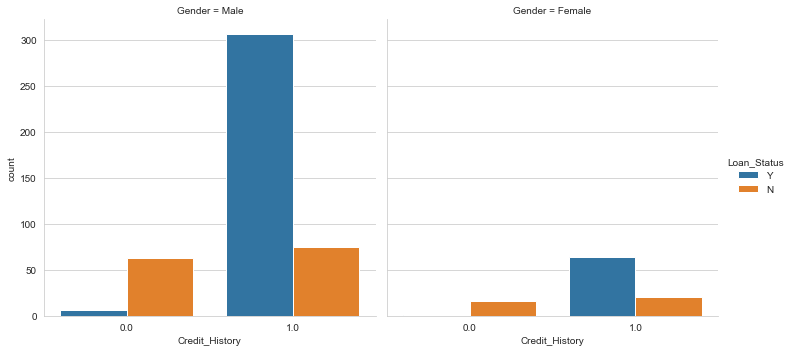

In [22]:
sns.catplot(x="Credit_History", hue="Loan_Status", col="Gender", data=train, kind="count")

In [23]:
train['Gender'].fillna('Male', inplace=True)
test['Gender'].fillna('Male', inplace=True)

# Married

In [24]:
train.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [25]:
pd.crosstab(train.Married, train.Loan_Status)

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [26]:
train.groupby(['Gender'])['Married'].value_counts(normalize=True)

Gender  Married
Female  No         0.720721
        Yes        0.279279
Male    Yes        0.734000
        No         0.266000
Name: Married, dtype: float64

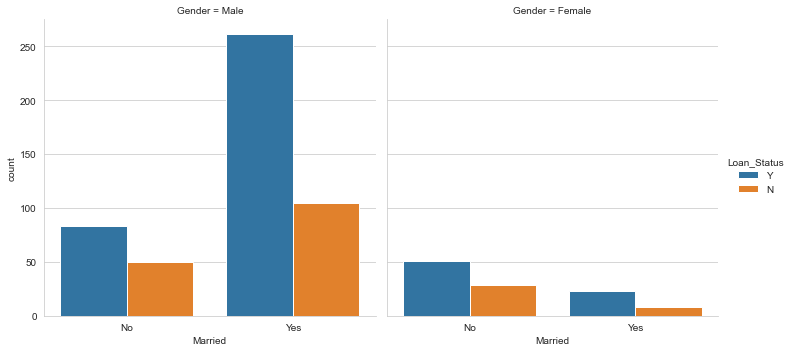

In [27]:
sns.catplot(x="Married", hue="Loan_Status", col="Gender", data=train, kind="count")

In [28]:
train.loc[train.Married.isnull() == True]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [29]:
train.loc[(train.Gender == 'Male') & (train.Married.isnull() == True), 'Married'] = 'Yes'
train.loc[(train.Gender == 'Female') & (train.Married.isnull() == True), 'Married'] = 'No'

# Dependents

In [30]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [31]:
train.groupby(['Dependents'])['Loan_Status'].value_counts(normalize=True)

Dependents  Loan_Status
0           Y              0.689855
            N              0.310145
1           Y              0.647059
            N              0.352941
2           Y              0.752475
            N              0.247525
3+          Y              0.647059
            N              0.352941
Name: Loan_Status, dtype: float64

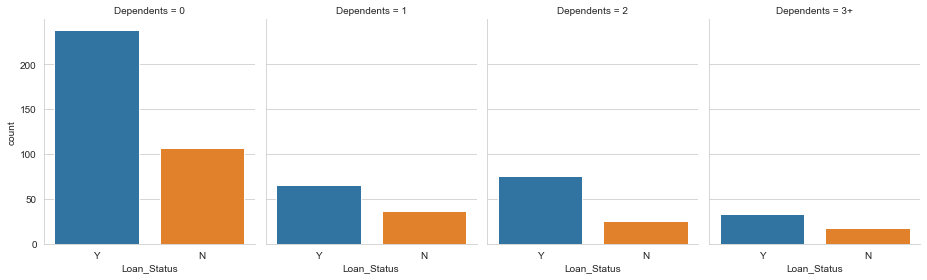

In [32]:
sns.catplot("Loan_Status", col="Dependents", col_wrap=4, data=train, kind="count",height=4, aspect=.8)

In [33]:
train.groupby(['Gender', 'Married', 'Property_Area'])['Dependents'].value_counts(normalize=True)

Gender  Married  Property_Area  Dependents
Female  No       Rural          0             0.842105
                                1             0.105263
                                3+            0.052632
                 Semiurban      0             0.735294
                                1             0.235294
                                2             0.029412
                 Urban          0             0.760000
                                1             0.120000
                                3+            0.080000
                                2             0.040000
        Yes      Rural          0             1.000000
                 Semiurban      0             0.650000
                                1             0.200000
                                2             0.150000
                 Urban          0             0.333333
                                1             0.333333
                                2             0.333333
Male    No       Rural

In [34]:
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode().iloc[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode().iloc[0])

# Education

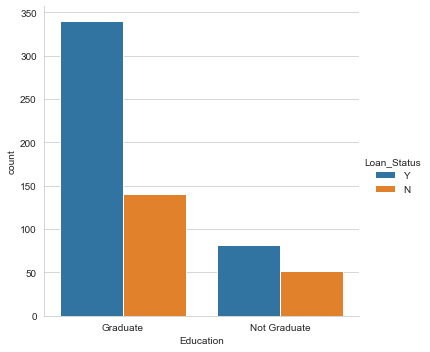

In [35]:
sns.catplot(x="Education", hue="Loan_Status", data=train, kind="count")

# Self_Employed

In [36]:
train.groupby(['Self_Employed'])['Loan_Status'].value_counts(normalize=True)

Self_Employed  Loan_Status
No             Y              0.686000
               N              0.314000
Yes            Y              0.682927
               N              0.317073
Name: Loan_Status, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


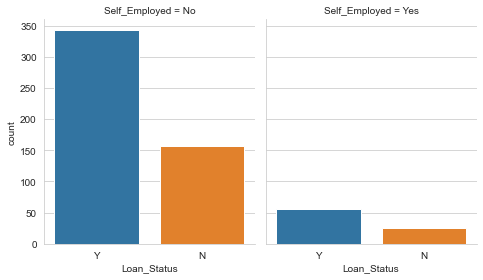

In [37]:
sns.catplot("Loan_Status", col="Self_Employed", col_wrap=4, data=train, kind="count", size=4, aspect=.8)

In [38]:
train.groupby(['Education', 'Married', 'Dependents', 'Property_Area'])['Self_Employed'].apply(lambda x: x.mode())

Education     Married  Dependents  Property_Area   
Graduate      No       0           Rural          0     No
                                   Semiurban      0     No
                                   Urban          0     No
                       1           Rural          0     No
                                                  1    Yes
                                   Semiurban      0     No
                                   Urban          0     No
                       2           Rural          0     No
                                   Semiurban      0     No
                                   Urban          0     No
                       3+          Rural          0     No
                                   Semiurban      0    Yes
              Yes      0           Rural          0     No
                                   Semiurban      0     No
                                   Urban          0     No
                       1           Rural          0     No
    

In [39]:
train.loc[(train.Education == 'Graduate') & (train.Married == 'No')
          & (train.Dependents == '1') & (train.Property_Area == 'Rural')
          & (train.Self_Employed.isnull() == True), 'Self_Employed'] = 'Yes'
train.loc[(test.Education == 'Graduate') & (test.Married == 'No')
          & (test.Dependents == '1') & (test.Property_Area == 'Rural')
          & (test.Self_Employed.isnull() == True), 'Self_Employed'] = 'Yes'
train.loc[(train.Education == 'Graduate') & (train.Married == 'No')
          & (train.Dependents == '3+') & (train.Property_Area == 'Semiurban')
          & (train.Self_Employed.isnull() == True), 'Self_Employed'] = 'Yes'
train.loc[(test.Education == 'Graduate') & (test.Married == 'No')
          & (test.Dependents == '3+') & (test.Property_Area == 'Semiurban')
          & (test.Self_Employed.isnull() == True), 'Self_Employed'] = 'Yes'
train.loc[(train.Education == 'Graduate') & (train.Married == 'Yes')
          & (train.Dependents == '2') & (train.Property_Area == 'Rural')
          & (train.Self_Employed.isnull() == True), 'Self_Employed'] = 'Yes'
train.loc[(test.Education == 'Graduate') & (test.Married == 'Yes')
          & (test.Dependents == '2') & (test.Property_Area == 'Rural')
          & (test.Self_Employed.isnull() == True), 'Self_Employed'] = 'Yes'
test.loc[(train.Education == 'Not Graduate') & (train.Married == 'No')
         & (train.Dependents == '1') & (train.Property_Area == 'Semiurban')
         & (train.Self_Employed.isnull() == True), 'Self_Employed'] = 'Yes'
test.loc[(test.Education == 'Not Graduate') & (test.Married == 'No')
         & (test.Dependents == '1') & (test.Property_Area == 'Semiurban')
         & (test.Self_Employed.isnull() == True), 'Self_Employed'] = 'Yes'
test.loc[(train.Education == 'Not Graduate') & (train.Married == 'No')
         & (train.Dependents == '1') & (train.Property_Area == 'urban')
         & (train.Self_Employed.isnull() == True), 'Self_Employed'] = 'Yes'
test.loc[(test.Education == 'Not Graduate') & (test.Married == 'No')
         & (test.Dependents == '1') & (test.Property_Area == 'urban')
         & (test.Self_Employed.isnull() == True), 'Self_Employed'] = 'Yes'
train['Self_Employed'].fillna('No', inplace=True)
test['Self_Employed'].fillna('No', inplace=True)

# ApplicantIncome

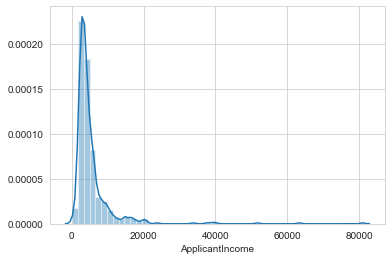

In [40]:
sns.distplot(train['ApplicantIncome'])

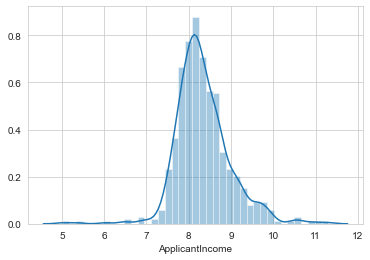

In [41]:
sns.distplot(np.log1p(train['ApplicantIncome']))

In [42]:
train['Income_group'] = pd.qcut(train.ApplicantIncome, 10, labels=[0,1,2,3,4,5,6,7,8,9])
test['Income_group'] = pd.qcut(test.ApplicantIncome, 10, labels=[0,1,2,3,4,5,6,7,8,9])

In [43]:
train['Income_group'] = train['Income_group'].astype(str)
test['Income_group'] = test['Income_group'].astype(str)

In [44]:
train.groupby(['Income_group'])['Loan_Status'].value_counts(normalize=True)

Income_group  Loan_Status
0             Y              0.661290
              N              0.338710
1             Y              0.721311
              N              0.278689
2             Y              0.704918
              N              0.295082
3             Y              0.709677
              N              0.290323
4             Y              0.639344
              N              0.360656
5             Y              0.737705
              N              0.262295
6             Y              0.612903
              N              0.387097
7             Y              0.721311
              N              0.278689
8             Y              0.688525
              N              0.311475
9             Y              0.677419
              N              0.322581
Name: Loan_Status, dtype: float64

# CoapplicantIncome

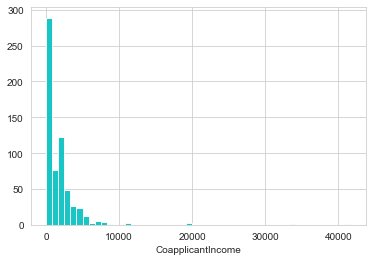

In [45]:
sns.distplot(train['CoapplicantIncome'], kde=False, color='c', hist_kws={'alpha': 0.9})

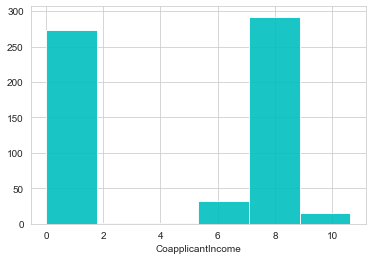

In [46]:
sns.distplot(np.log1p(train['CoapplicantIncome']), kde=False, color='c', hist_kws={'alpha': 0.9})

In [47]:
train['Coap_group'] =  pd.qcut(train.CoapplicantIncome, 2, labels=[0,1])
test['Coap_group'] =  pd.qcut(test.CoapplicantIncome, 2, labels=[0,1])

In [48]:
train['Coap_group'] = train['Coap_group'].astype(str)
test['Coap_group'] = test['Coap_group'].astype(str)

In [49]:
train.groupby(['Coap_group'])['Loan_Status'].value_counts(normalize=True)

Coap_group  Loan_Status
0           Y              0.677524
            N              0.322476
1           Y              0.697068
            N              0.302932
Name: Loan_Status, dtype: float64

# LoanAmount

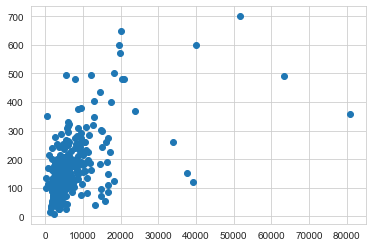

In [50]:
plt.scatter(train['ApplicantIncome'], train['LoanAmount'])

In [51]:
df_groupby1 = pd.DataFrame(train.groupby(['Education', 'Gender', 'Income_group', 'Self_Employed'])['LoanAmount'].median())
df_groupby1.head(60)

LoanAmount
Education    Gender Income_group Self_Employed            
Graduate     Female 0            No                  113.0
                    1            No                  100.0
                                 Yes                  96.0
                    2            No                   87.0
                    3            No                  102.5
                    4            No                  112.5
                                 Yes                 122.0
                    5            No                  115.5
                    6            No                  115.0
                                 Yes                 133.0
                    7            No                  149.5
                                 Yes                 105.0
                    8            No                  200.0
                                 Yes                 172.0
                    9            No                  219.5
                                 Yes                 286.0
             Male   0            No                   96.0
                                 Yes                 160.0
                    1            No                  104.0
                                 Yes                 164.0
                    2            No                  120.5
                                 Yes                  95.0
                    3            No                  131.0
                                 Yes                  88.0
                    4            No                  119.5
                                 Yes                 130.0
                    5            No                  130.0
                    6            No                  129.0
                                 Yes                 128.0
                    7            No                  172.5
                                 Yes                 144.0
                    8            No                  182.5
                                 Yes                 220.0
                    9            No                  275.0
                                 Yes                 182.0
Not Graduate Female 0            No                   98.0
                    2            No                   91.0
                    3            No                   95.0
                    5            No                  124.0
                                 Yes                  62.0
                    6            No                  120.0
                    7            No                  132.0
                    8            Yes                 138.0
                    9            Yes                 175.0
             Male   0            No                   95.0
                                 Yes                  97.0
                    1            No                  118.0
                                 Yes                 104.0
                    2            No                   98.0
                                 Yes                 177.5
                    3            No                  113.0
                                 Yes                 130.0
                    4            No                  109.0
                    5            No                  124.0
                                 Yes                 158.0
                    6            No                  124.0
                                 Yes                  96.0
                    7            No                  161.0
                                 Yes                 131.0
                    8            No                  130.0

In [52]:
train.groupby(['Education', 'Gender', 'Self_Employed'])['LoanAmount'].median()

Education     Gender  Self_Employed
Graduate      Female  No               113.0
                      Yes              127.5
              Male    No               134.0
                      Yes              160.0
Not Graduate  Female  No               100.0
                      Yes              131.5
              Male    No               113.0
                      Yes              130.0
Name: LoanAmount, dtype: float64

In [53]:
train['LoanAmount'] = train.groupby(['Education', 'Gender', 'Income_group', 'Self_Employed'])['LoanAmount'].apply(lambda x: x.fillna(x.mean()))
test['LoanAmount'] = test.groupby(['Education', 'Gender', 'Income_group', 'Self_Employed'])['LoanAmount'].apply(lambda x: x.fillna(x.mean()))

In [54]:
train['LoanAmount'] = train.groupby(['Education', 'Gender', 'Self_Employed'])['LoanAmount'].apply(lambda x: x.fillna(x.mean()))
test['LoanAmount'] = test.groupby(['Education', 'Gender', 'Self_Employed'])['LoanAmount'].apply(lambda x: x.fillna(x.mean()))

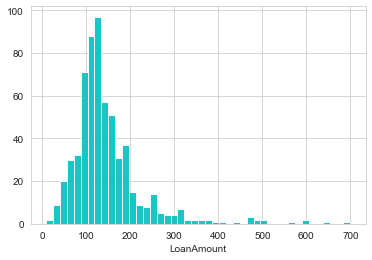

In [55]:
sns.distplot(train['LoanAmount'], kde=False, color='c', hist_kws={'alpha': 0.9})

In [56]:
train['Loan_group'] =  pd.qcut(train.LoanAmount, 10, labels=[0,1,2,3,4,5,6,7,8,9])
test['Loan_group'] =  pd.qcut(test.LoanAmount, 10, labels=[0,1,2,3,4,5,6,7,8,9])
train['Loan_group'] = train['Loan_group'].astype(str)
test['Loan_group'] = test['Loan_group'].astype(str)

# Loan_Amount_Term

In [57]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

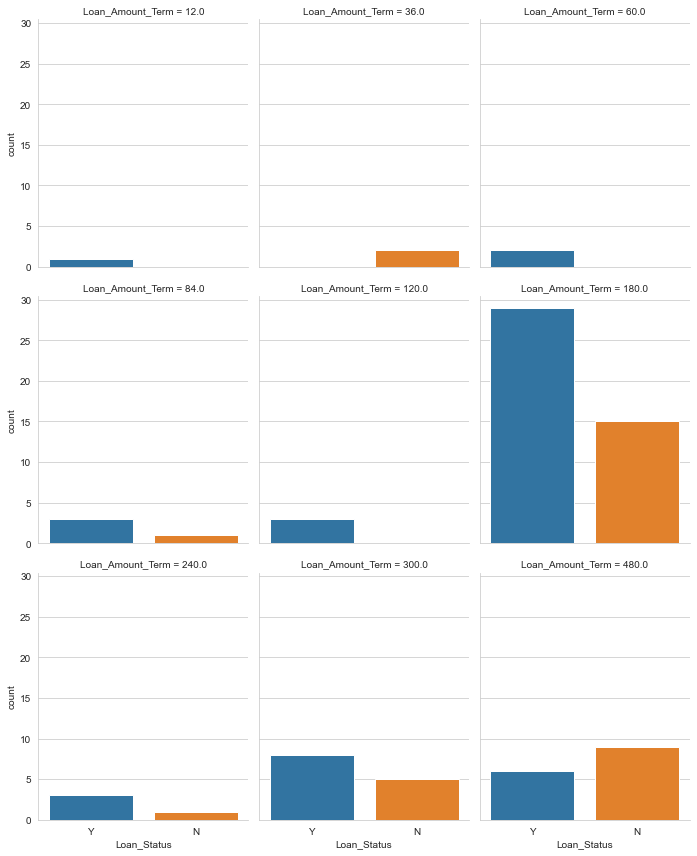

In [58]:
sns.catplot("Loan_Status", col="Loan_Amount_Term", col_wrap=3,
               data=train.loc[train.Loan_Amount_Term !=360.], kind="count", height=4, aspect=.8)

In [73]:
#Nous utiliserons cette commande pour afficher l'ensemble du dataframe en question.
from IPython.core.display import HTML
df_groupby2 = pd.DataFrame(train.groupby(['Education', 'Income_group', 'Loan_group'])['Loan_Amount_Term'].apply(lambda x: x.mode()))
display(HTML(df_groupby2.to_html()))

In [64]:
train['Loan_Amount_Term'].fillna(360.0, inplace=True)
test['Loan_Amount_Term'].fillna(360.0, inplace=True)
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype(str)
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype(str)

# Credit_History

In [65]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [76]:
display(HTML(pd.DataFrame(train.groupby(['Education', 'Self_Employed', 'Property_Area', 'Income_group'])['Credit_History'].apply(lambda x: x.mode())).to_html()))

In [77]:
train.loc[(train.Education == 'Graduate') & (train.Self_Employed == 'Yes')
          & (train.Property_Area == 'Urban') & (train.Income_group == '9') & (train.Credit_History.isnull() == True),
          'Self_Employed'] = 0.0
train.loc[(train.Education == 'Not Graduate') & (train.Self_Employed == 'No')
          & (train.Property_Area == 'Rural') & (train.Income_group == '7') & (train.Credit_History.isnull() == True),
          'Self_Employed'] = 0.0
train.loc[(train.Education == 'Not Graduate') & (train.Self_Employed == 'No')
          & (train.Property_Area == 'Urban') & (train.Income_group == '2') & (train.Credit_History.isnull() == True),
          'Self_Employed'] = 0.0
test.loc[(test.Education == 'Graduate') & (test.Self_Employed == 'Yes')
          & (test.Property_Area == 'Urban') & (test.Income_group == '9') & (test.Credit_History.isnull() == True),
          'Self_Employed'] = 0.0
test.loc[(test.Education == 'Not Graduate') & (test.Self_Employed == 'No')
          & (test.Property_Area == 'Rural') & (test.Income_group == '7') & (test.Credit_History.isnull() == True),
          'Self_Employed'] = 0.0
test.loc[(test.Education == 'Not Graduate') & (test.Self_Employed == 'No')
          & (test.Property_Area == 'Urban') & (test.Income_group == '2') & (test.Credit_History.isnull() == True),
          'Self_Employed'] = 0.0
train['Credit_History'].fillna(1.0, inplace=True)
test['Credit_History'].fillna(1.0, inplace=True)
train['Credit_History'] = train['Credit_History'].astype(str)
test['Credit_History'] = test['Credit_History'].astype(str)

# Property_Area

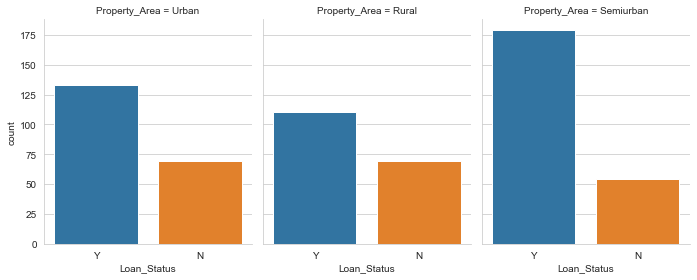

In [81]:
sns.catplot('Loan_Status', col='Property_Area', col_wrap=3, data=train, kind='count', height=4, aspect=.8)

# Data Preparation

In [82]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
Income_group          object
Coap_group            object
Loan_group            object
dtype: object

In [83]:
for col in train.columns.drop('Loan_Status'):
    if train[col].dtype != 'object':
        if skew(train[col]) > 0.75:
            train[col] = np.log1p(train[col])
        pass
    else:
        dummies = pd.get_dummies(train[col], drop_first=False)
        dummies = dummies.add_prefix("{}_".format(col))
        if col == 'Credit_History' or col == 'Loan_Amount_Term':
            pass
        else:
            train.drop(col, axis=1, inplace=True)
        train = train.join(dummies)
for col in test.columns:
    if test[col].dtype != 'object':
        if skew(test[col]) > 0.75:
            test[col] = np.log1p(test[col])
        pass
    else:
        dummies = pd.get_dummies(test[col], drop_first=False)
        dummies = dummies.add_prefix("{}_".format(col))
        if col == 'Credit_History' or col == 'Loan_Amount_Term':
            pass
        else:
            test.drop(col, axis=1, inplace=True)
        test = test.join(dummies)

In [84]:
#I leave these two variables as they seem to be important by themselves.
train['Credit_History'] = train['Credit_History'].astype(float)
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype(float)
test['Credit_History'] = test['Credit_History'].astype(float)
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype(float)

In [85]:
X_train = train.drop('Loan_Status', axis=1)
le = LabelEncoder()
Y_train = le.fit_transform(train.Loan_Status.values)
X_test = test

In [86]:
clf = RandomForestClassifier(n_estimators=200)
clf = clf.fit(X_train, Y_train)
indices = np.argsort(clf.feature_importances_)[::-1]

print('Feature ranking:')
for f in range(X_train.shape[1]):
    print('%d. feature %d %s (%f)' % (f + 1, indices[f], X_train.columns[indices[f]],
                                      clf.feature_importances_[indices[f]]))

Feature ranking:
1. feature 0 ApplicantIncome (0.104896)
2. feature 29 Credit_History_1.0 (0.098852)
3. feature 2 LoanAmount (0.095742)
4. feature 4 Credit_History (0.090133)
5. feature 28 Credit_History_0.0 (0.089733)
6. feature 1 CoapplicantIncome (0.066152)
7. feature 30 Property_Area_Rural (0.019017)
8. feature 3 Loan_Amount_Term (0.018431)
9. feature 31 Property_Area_Semiurban (0.018276)
10. feature 9 Dependents_0 (0.018111)
11. feature 39 Income_group_6 (0.016177)
12. feature 32 Property_Area_Urban (0.014829)
13. feature 8 Married_Yes (0.014820)
14. feature 7 Married_No (0.014728)
15. feature 10 Dependents_1 (0.014684)
16. feature 52 Loan_group_7 (0.014250)
17. feature 13 Education_Graduate (0.012931)
18. feature 14 Education_Not Graduate (0.012352)
19. feature 46 Loan_group_1 (0.011866)
20. feature 38 Income_group_5 (0.011532)
21. feature 6 Gender_Male (0.011125)
22. feature 44 Coap_group_1 (0.010942)
23. feature 16 Self_Employed_No (0.010695)
24. feature 5 Gender_Female (0.0106

In [87]:
best_features = X_train.columns[indices[0:6]]
X = X_train[best_features]
Xt = X_test[best_features]

# Model

In [88]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y_train, test_size=0.20, random_state=36)

In [89]:
clf = RandomForestClassifier(n_estimators=300, n_jobs=-1, criterion = 'gini')

calibrated_clf = CalibratedClassifierCV(clf, method='isotonic', cv=5)
calibrated_clf.fit(Xtrain, ytrain)
y_val = calibrated_clf.predict_proba(Xtest)
y_f = [1 if y_val[i][0] < 0.5 else 0 for i in range(len(ytest))]
sum(y_f == ytest) / len(ytest)

0.7723577235772358

In [90]:
clf = RandomForestClassifier(n_estimators=300, n_jobs=-1, criterion = 'gini')
calibrated_clf = CalibratedClassifierCV(clf, method='isotonic', cv=5)
calibrated_clf.fit(X, Y_train)
y_submit = calibrated_clf.predict_proba(Xt)
y_pred = le.inverse_transform([1 if y_submit[i][0] < 0.5 else 0 for i in range(len(Xt))])
submission = pd.DataFrame({'Loan_ID':test_id, 'Loan_Status':y_pred})
submission.to_csv('Loan.csv', index=False)